In [115]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [80]:
digit = datasets.load_digits()
x = digit.data
y = digit.target.copy()
x.shape
y.shape

(1797,)

In [81]:
y[digit.target==9] = 1
y[digit.target!=9] = 0
y[y==1].shape

(180,)

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [83]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(X_train,y_train)
logis.score(X_test,y_test)

d:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9833333333333333

In [84]:
def TN(y_test,y_predict):
    return np.sum((y_test == 0) & (y_predict == 0))

In [85]:
def TP(y_test,y_predict):
    return np.sum((y_test == 0) & (y_predict == 1))

In [86]:
def FN(y_test,y_predict):
    return np.sum((y_test == 1) & (y_predict == 0))

In [87]:
def FP(y_test,y_predict):
    return np.sum((y_test == 1) & (y_predict == 1))

In [88]:
def matrix(y_test,y_predict):
    return np.array([[TN(y_test,y_predict),TP(y_test,y_predict)],
                    [FN(y_test,y_predict),FP(y_test,y_predict)]])

In [89]:
y_predict = logis.predict(X_test)
matrix(y_test,y_predict)

array([[488,   4],
       [  5,  43]])

In [90]:
def precision(y_test,y_predict):
    try:
        return FP(y_test,y_predict)/(FP(y_test,y_predict)+TP(y_test,y_predict))
    except:
        return 0

In [91]:
def recall(y_test,y_predict):
    try:
        return FP(y_test,y_predict)/(FP(y_test,y_predict)+FN(y_test,y_predict))
    except:
        return 0

In [92]:
y_predict = logis.predict(X_test)
precision(y_test,y_predict)

0.9148936170212766

In [93]:
recall(y_test,y_predict)

0.8958333333333334

In [94]:
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_predict)

In [95]:
con

array([[488,   4],
       [  5,  43]], dtype=int64)

In [96]:
from sklearn.metrics import precision_score
pre = precision_score(y_test,y_predict)
pre

0.9148936170212766

In [97]:
from sklearn.metrics import recall_score
rec = recall_score(y_test,y_predict)
rec

0.8958333333333334

In [98]:
decision_score = logis.decision_function(X_test)
decision_score.shape

(540,)

In [99]:
decision_score[:10]



array([  9.49375803,  14.97775104, -32.97771237, -18.90864902,
       -17.99983317, -13.38664789, -63.50010024, -23.50135236,
       -17.85591871, -27.50479284])

In [100]:
y_predict2 = np.array(decision_score>=-1,dtype="int")
pre2 = precision_score(y_test,y_predict2)
pre2


0.86

In [101]:
rec2 = recall_score(y_test,y_predict2)
rec2


0.8958333333333334

In [102]:
decision_score = logis.decision_function(X_test)
decision_score.shape
a = np.max(decision_score)
b = np.min(decision_score)


In [125]:
decision_sc = np.arange(b,a,0.1)
decision_sc.shape

(1186,)

In [126]:
decision_sc

array([-92.06786248, -91.96786248, -91.86786248, ...,  26.23213752,
        26.33213752,  26.43213752])

In [127]:
precision_score = []
recall_score = []
for i in decision_sc:
    y_predict2 = np.array(decision_score>=i,dtype="int")
    precision_score.append(precision(y_test,y_predict2))
    recall_score.append(recall(y_test,y_predict2))

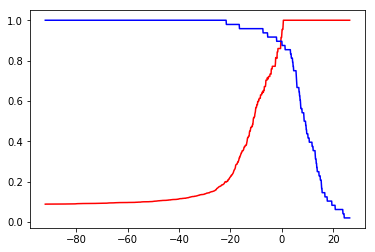

In [128]:
plt.plot(decision_sc,precision_score,color = 'red')
plt.plot(decision_sc,recall_score,color = "blue")

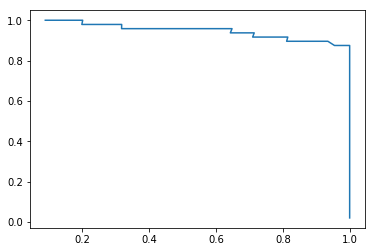

In [129]:
plt.plot(precision_score,recall_score)



In [130]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_test,decision_score)


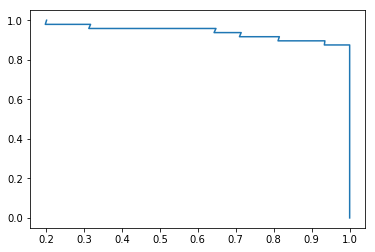

In [131]:
plt.plot(precisions,recalls)


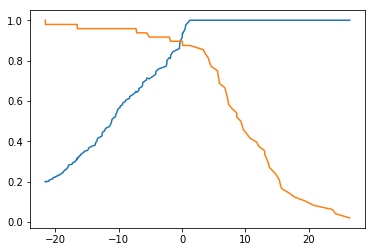

In [133]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])

In [135]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,decision_score)


In [137]:
fpr.shape
tpr.shape
thresholds.shape

(16,)

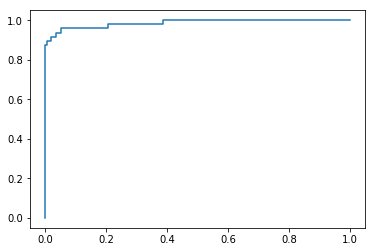

In [138]:
plt.plot(fpr,tpr)

In [139]:
from sklearn.metrics import roc_auc_score
ras = roc_auc_score(y_test,decision_score)



In [140]:
ras

0.9853065718157181